In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import exp

# Gamma Distribution

Some continuous random variables are bounded to one side and their PDF are skewed. 

Examples of continuous variables that would have this sort of probability density function are:  waiting times between malfunctions (as a continuous time rather than discrete times), the amount of time it takes to service a car at a mechanics, the amount of material used in a manufacturing process, or the concentration of a contaminant. 

For *some* random variables with these properties, the **gamma distribution** with the correct choices of parameters is an accurate model. Later in this class we will discuss how we will test how good a model is (and in STAT 411 we will spend even more time discussing how to test models).

## Definition of the Gamma Distribution

A random variable $Y$ is said to have a *gamma distribution with parameters $\alpha > 0$ and $\beta > 0$* if the density function of $Y$ is:

$$ f(y) = \left\{ \begin{matrix} \frac{y^{\alpha-1} e^{-y/\beta} }{\beta^\alpha \Gamma(\alpha) } & 0\leq y < \infty \\ 0 & y < 0 \end{matrix} \right. $$

where 

$$\Gamma(\alpha) = \int_0^\infty y^{\alpha-1} e^{-y} dy $$

### The Gamma Function

This distribution uses the *Gamma Function* which is a classic construction appearing in multiple fields of mathematics, particularly it is part of the *Riemann Hypothesis*. The *Gamma Function* has the following properties:

- $$\Gamma(1) = 1 $$ which you can check by direct integration 

- $$\Gamma(\alpha) = (\alpha - 1) \Gamma(\alpha - 1) $$ which you can check with integration by parts

Together these imply that for integer values of $\alpha = n+1$ 

$$\Gamma(n+1) = n \Gamma(n) = n! $$

We won't show these two properties here, but I encourage you to check them sometime.

All together this means that the *Gamma Function* is a continuation of the factorial function to the positive real numbers (and actually even to complex numbers with positive real part). None of this really matters for the probability other than 

$$ \frac{1}{\beta^\alpha \Gamma(\alpha)} $$ 

is the normalization constant that makes $f(y)$ a valid probability density function with total mass 1.

## Graphs of the Gamma Distribution

Let's look at some graphs of $f(y)$ for some choices of $\alpha$ and $\beta$. The Scipy module has the Gamma Function predefined for us.


In [ ]:
from scipy.special import gamma

In [ ]:
def gamma_pdf(y, alpha, beta):
    
    if y < 0:
        return 0
    else:
        return y**(alpha-1) * exp(-y/beta) / ( beta**alpha * gamma(alpha) )

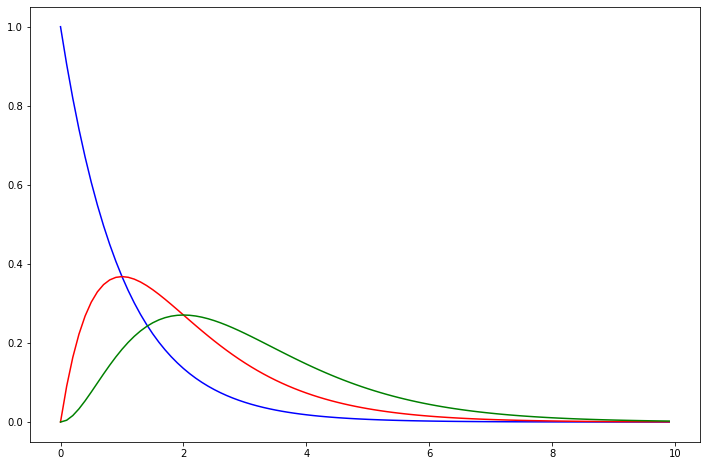

In [ ]:
yy = np.arange(0, 10, 0.1)

f1 = [ gamma_pdf(y, 1, 1) for y in yy]
f2 = [ gamma_pdf(y, 2, 1) for y in yy]
f3 = [ gamma_pdf(y, 3, 1) for y in yy]

plt.figure(figsize = (12, 8))
plt.plot(yy, f1, 'b-')
plt.plot(yy, f2, 'r-')
plt.plot(yy, f3, 'g-')

### Let's plot the CDF Also



In [ ]:
import scipy.integrate as integrate

In [ ]:
def plot_gamma_cdf(alpha, beta, color='b-', ymin=0, ymax=10, n=1000, lower_bound = 0):

    h = (ymax - ymin)/n
    yy = np.arange(ymin, ymax, h)
    
    # We need to define the integrand to be the Gamma pdf with parameters alpha and beta
    # its easy to do this with a lambda using the gamma_pdf we defined above.
    f = lambda y: gamma_pdf(y, alpha, beta)
    
    F = [ integrate.quad(f, lower_bound, y)[0] for y in yy ]
    # More on how scipy.integrate.quad works below
    
    ax = plt.plot(yy, F, color);
    
    return ax

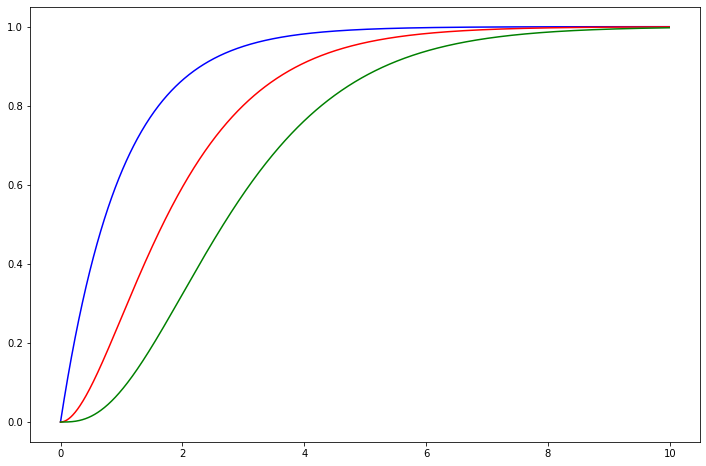

In [ ]:
# Note a couple of python tricks here:  I use a lambda function to set the parameters of the already defined pdf function
# I pass a color parameter that lets me adjust the graphs 
# I use the matplotlib.pyplot figure designation to combine multiple plots.

ax = plt.figure(figsize=(12, 8))
plot_gamma_cdf(1,1, color = 'b-')
plot_gamma_cdf(2,1, color = 'r-')
plot_gamma_cdf(3,1, color = 'g-')

## $\alpha=1$ the Exponential Distribution

Note that $\alpha$ an integer are special cases, and in fact these are the only cases for which exact results are possible for the *cummulative distribution function*. Furthermore $\alpha = 1$ is something of a special case:

$$ f(y) = \left\{ \begin{matrix} \frac{e^{-y/\beta} }{\beta } & 0\leq y < \infty \\ 0 & y < 0 \end{matrix} \right. $$

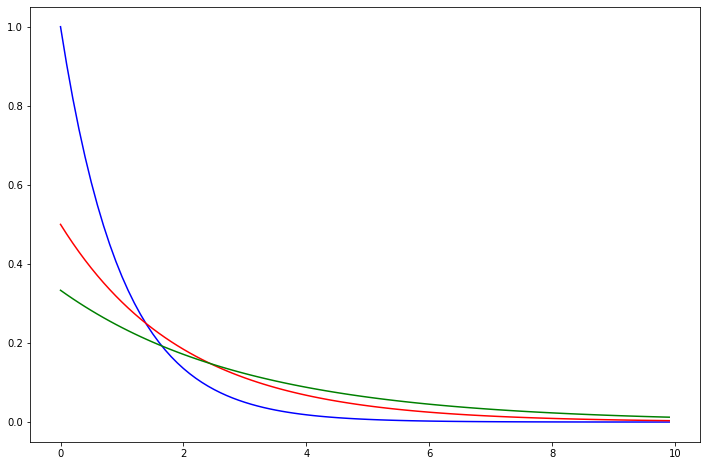

In [ ]:
yy = np.arange(0, 10, 0.1)

f1 = [ gamma_pdf(y, 1, 1) for y in yy]
f2 = [ gamma_pdf(y, 1, 2) for y in yy]
f3 = [ gamma_pdf(y, 1, 3) for y in yy]

plt.figure(figsize = (12, 8))
plt.plot(yy, f1, 'b-')
plt.plot(yy, f2, 'r-')
plt.plot(yy, f3, 'g-')

### And then the corresponding CDF


1

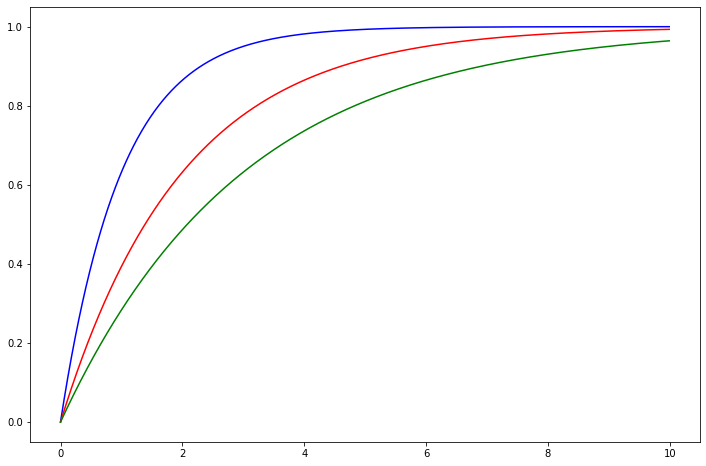

In [ ]:
ax = plt.figure(figsize=(12, 8))
plot_gamma_cdf(1,1, color = 'b-')
plot_gamma_cdf(1,2, color = 'r-')
plot_gamma_cdf(1,3, color = 'g-')

## Expected Value of the Gamma Distribution

Let's go back to generic $\alpha$ and $\beta$ and compute $E(Y)$:

$$ E(Y) = \int_{-\infty}^\infty y f(y) $$
$$ = \frac{1}{\beta^\alpha \Gamma(\alpha) } \int_0^\infty y^\alpha e^{-y/\beta} dy$$

Note that by our definition of $\Gamma(\alpha)$:

$$ \Gamma(\alpha) = \int_0^\infty y^{\alpha-1} e^{-y} dy $$
and by a u-substitution
$$ \beta^\alpha \Gamma(\alpha) = \int_0^\infty y^{\alpha-1} e^{-y/\beta} dy  $$

Therefore we have that the integral in $E(Y)$ is 
$$ \int_0^\infty y^{\alpha} e^{-y/\beta} dy = \beta^{\alpha+1} \Gamma(\alpha+1) $$

Putting it all together then:

$$ E(Y) = \frac{\beta^{\alpha+1} \Gamma(\alpha+1)}{\beta^{\alpha} \Gamma(\alpha)} = \alpha \beta $$

## Variance of the Gamma Distribution

To computer the variance we note that 

$$ \sigma^2 = V(Y) = E( (Y - E(Y))^2 ) $$
$$ = E( Y^2 - 2 Y E(Y) + E(Y)^2 ) $$
$$ = E(Y^2) - 2 E(Y)^2 + E( E(Y)^2 ) $$

Noting that expected value is a linear operator. We then note that 

$$E( E(Y)^2 ) = E(Y)^2$$ 

because the expected value of a constant is always the constant. and so

$$ V(Y) = E(Y^2) - E(Y)^2 $$

Noting that this formula is true for every real random variable $Y$. 


We have $E(Y) = \alpha \beta$ and so we just need to compute $E(Y^2)$:

$$ E(Y^2) = \frac{1}{\beta^\alpha \Gamma(\alpha)} \int_0^\infty y^{\alpha+1} e^{-y/\beta} dy $$
$$ = \frac{\beta^{\alpha+2} \Gamma(\alpha+2) }{\beta^\alpha \Gamma(\alpha) } $$ 
$$ = (\alpha+1)\alpha \beta^2 $$

Combining this in your formula for the variance we get:

$$ V(Y) = (\alpha+1)\alpha \beta^2 - \alpha^2 \beta^2 $$
$$ = \alpha\beta^2 \left( \alpha + 1 - \alpha \right) $$
$$ = \alpha \beta^2 $$

## Example:  Accidents

Historical data on accidents on American domestic passenger flights indicates that the time between fatalities is approximately exponentially distributed ($\alpha=1$) with a mean time between fatalities of 44 days. 

If a fatal accident occurs on July 1, what is the probability that another accident occurs in the same month?

## Example: Customer Serice

A call center finds that the time a customer has to wait on hold fits a gamma distribution with a mean waiting time of 2 minutes and a variance of 6 minutes. Plot the probability density function and cummulative distribution function for the hold time.

# The Beta Probability Distribution 

Likewise, some problems give a continuous random variable on a closed interval. Notably if the variable Y is the proportion of impurities in a chemical or the proportion of the time that a machine is not functioning. Again the distrubtion has two parameters that are used to tune its shape to the specific problem based on data, and in particular that change the extent to which the density is asymmetric. 

Later in the semester we will learn more about how to test if we have the correct values for a distribution to be a good model for data, and this is something we will explore in more depth in the STAT 411 course.

### Open Question from a Traffic Engineer Friend

Given a stretch of road, where along the road will a pedestrian cross?

## Definition of the Beta Distribution

A random variable $Y$ is said to have a *beta probability distribution with parameters $\alpha > 0 $ and $\beta > 0$* if the density function is 

$$ f(y) = \left\{ \begin{matrix} \frac{y^{\alpha-1} (1-y)^{\beta-1} }{B(\alpha, \beta)} & 0 \leq y \leq 1 \\ 0 & \mbox{elsewhere} \end{matrix} \right. $$

with the normalization defined by

$$ B(\alpha, \beta) = \int_0^1 y^{\alpha-1} (1-y)^{\beta-1} dy = \frac{\Gamma(\alpha) \Gamma(\beta)}{\Gamma(\alpha+\beta)} $$

In [ ]:
def beta_pdf(y, alpha, beta):
    
    if y <= 0:
        return 0
    elif y >= 1:
        return 0
    else:
        return y**(alpha-1) * (1-y)**(beta-1) * gamma(alpha+beta)/( gamma(alpha)*gamma(beta) )

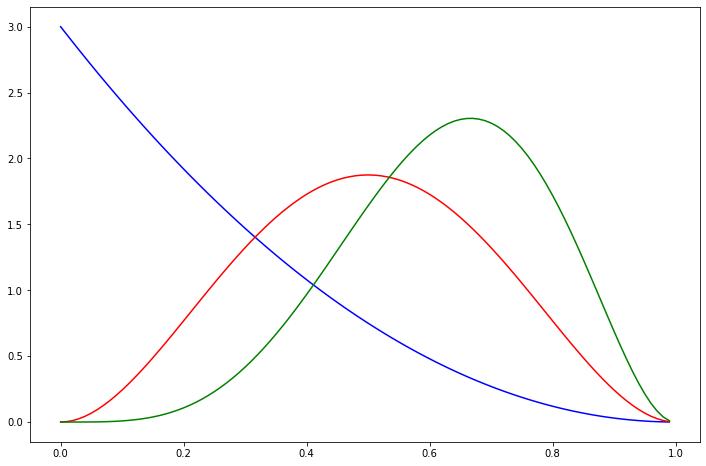

In [ ]:
yy = np.arange(0, 1, 0.01)

f1 = [ beta_pdf(y, 1, 3) for y in yy]
f2 = [ beta_pdf(y, 3, 3) for y in yy]
f3 = [ beta_pdf(y, 5, 3) for y in yy]

plt.figure(figsize = (12, 8))
plt.plot(yy, f1, 'b-')
plt.plot(yy, f2, 'r-')
plt.plot(yy, f3, 'g-')

Note that beta distributions are symmetric:  $$ f(y, \alpha, \beta) = f(1-y, \beta, \alpha) $$

### Let's plot the CDF also

In [ ]:
def plot_beta_cdf(alpha, beta, color='b-', ymin=0, ymax=1, n=1000, lower_bound = 0):

    h = (ymax - ymin)/n
    yy = np.arange(ymin, ymax, h)
    
    # We need to define the integrand to be the Gamma pdf with parameters alpha and beta
    # its easy to do this with a lambda using the gamma_pdf we defined above.
    f = lambda y: beta_pdf(y, alpha, beta)
    
    F = [ integrate.quad(f, lower_bound, y)[0] for y in yy ]
    # More on how scipy.integrate.quad works below
    
    ax = plt.plot(yy, F, color);
    
    return ax

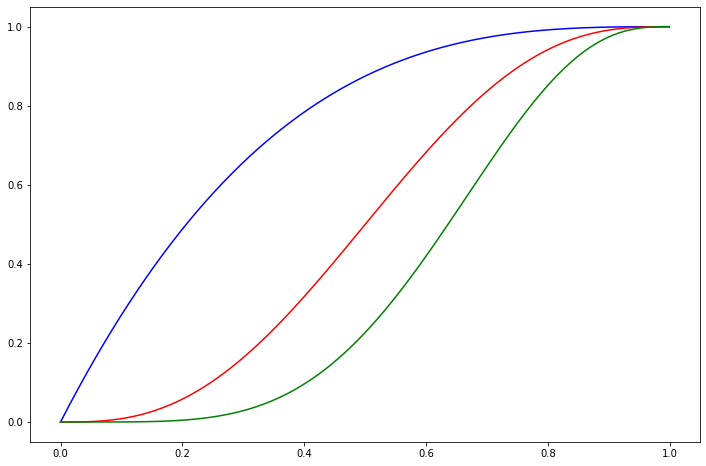

In [ ]:
ax = plt.figure(figsize=(12, 8))
plot_beta_cdf(1,3, color = 'b-')
plot_beta_cdf(3,3, color = 'r-')
plot_beta_cdf(5,3, color = 'g-')

## Expected Value and Variance of Beta Distributions

$$ E(Y) = \frac{\alpha}{\alpha+\beta} $$

and 

$$\sigma^2 = V(Y) = \frac{\alpha \beta}{ (\alpha+\beta)^2 (\alpha+\beta + 1) } $$

## Example: the relative hummidity at an airport has a probably density function given by a beta distribution with $\alpha = 4$ and $\beta = 3$.

- Find the likeliehood that the relative hummidity is smaller than 0.25

- Find the expected value of the relative hummidity

- Find an approximate interval centered on the expected value that has a 95% probability of being where the relative hummidity is